Name: Abhishek Roy

Reg. No: 21BPS1366

Perform the below Tasks to complete the Assignment:-

Task 1: Download the dataset.(Dataset is downloaded)

 Task 2: Load the dataset into the tool

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
DF=pd.read_csv('/content/penguins_size.csv')
DF.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Task 3: Perform the below Visualitions:

=>Univariate Analysis

<ipython-input-3-1500f0485db4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DF.flipper_length_mm)


<Axes: xlabel='flipper_length_mm', ylabel='Density'>

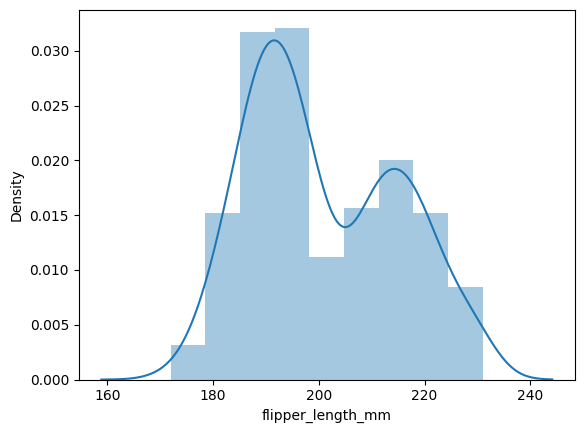

In [ ]:
sns.distplot(DF.flipper_length_mm)

=>Bi-variate Analysis

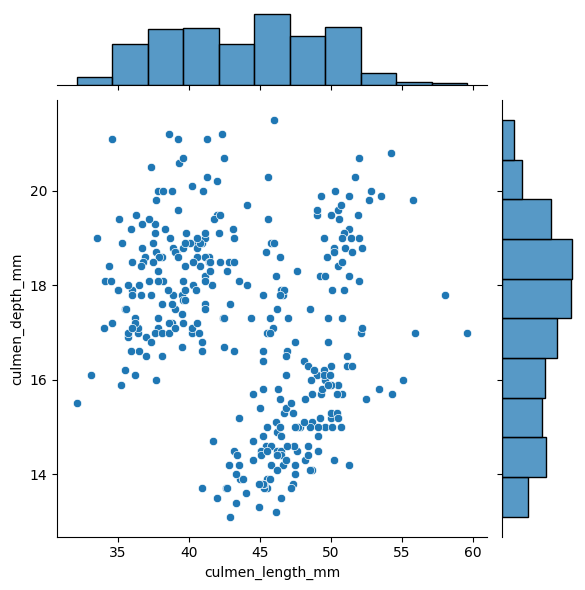

In [ ]:
sns.jointplot(x='culmen_length_mm',y='culmen_depth_mm',data=DF)

=>Multivariate Analysis

<ipython-input-5-a8b24e2caea2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(DF.corr(),annot=True)


<Axes: >

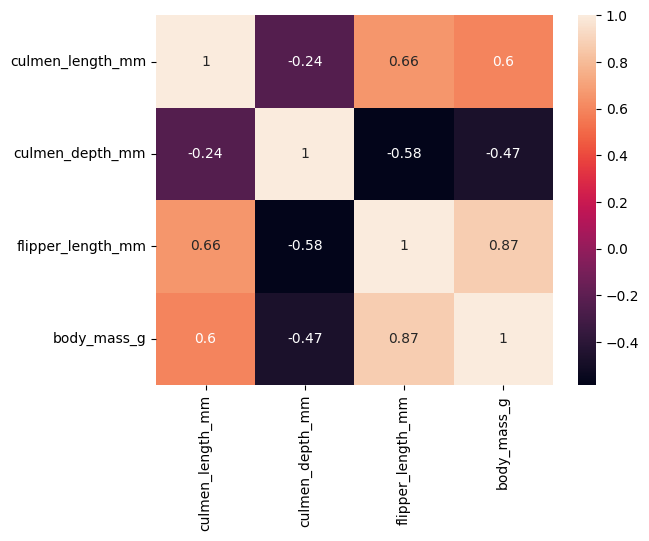

In [ ]:
sns.heatmap(DF.corr(),annot=True)

Task 4: Perform descriptive statistics on the dataset.

In [ ]:
DF.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Task 5: Check for Missing values and deal with them.

In [ ]:
DF.isnull().sum()
DF=DF.dropna()
DF

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Task 6: Find the outliers and replace them outliers

In [ ]:
from scipy import stats
num_column=DF.select_dtypes(include=[np.number])
z_threshold = 3.0
def replace_outliers_with_median(data, z_threshold):
    z_scores = np.abs(stats.zscore(data))
    outliers = (z_scores > z_threshold).any(axis=1)
    data[outliers] = np.nan
    median_values = data.median()
    data.fillna(median_values, inplace=True)
replace_outliers_with_median(num_column, z_threshold)

Task 7: Check the correlation of independent variables with the target

In [ ]:
target_column = "body_mass_g"
correlations = DF.corr()[target_column].sort_values(ascending=False)
print(correlations)

body_mass_g          1.000000
flipper_length_mm    0.873211
culmen_length_mm     0.589066
culmen_depth_mm     -0.472987
Name: body_mass_g, dtype: float64


<ipython-input-22-5a470756e1bb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = DF.corr()[target_column].sort_values(ascending=False)


Task 8: Check for Categorical columns and perform encoding.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
categorical_columns = ["species", "island", "sex"]
numeric_columns = [col for col in X.columns if col not in categorical_columns]
categorical_transformer = "passthrough"
numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_columns),
        ("num", numeric_transformer, numeric_columns),
    ]
)
pipeline = Pipeline(steps=[("preprocessor", preprocessor)])
X_scaled = pipeline.fit_transform(X)

Task 9: Split the data into dependent and independent variables.

In [ ]:
X=DF.drop(['culmen_depth_mm'],axis=1)
Y=DF['culmen_depth_mm']

In [ ]:
X.head()

,species,island,culmen_length_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,190.0,3650.0,MALE


In [ ]:
Y.head()

0    18.7
1    17.4
2    18.0
4    19.3
5    20.6
Name: culmen_depth_mm, dtype: float64

Task 10: Scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler

Task 11: Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Task 12: Check the training and testing data shape

In [ ]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(267, 6) (267,)
(67, 6) (67,)
